# Pr6-3: 画像のヒストグラム

## 画像のヒストグラムの計算・表示

 cv2.calcHist関数で画像のヒストグラムを計算できます．<br>

```py
hist = cv2.calcHist([I_gray],channels=[0],mask=None,histSize=[256],ranges=[0,256])
```

 結果のhistはベクトルデータなのでplt.plot関数でグラフを書けます．
```py
plt.plot(hist)
```

 - 横軸: 画素値
 - 縦軸: 画素値の頻度



- hist_size: (256, 1)
[ 17.  21.   7.  12.  12.  10.  19.  28.  28.  39.  55.  73. 100. 125.
 162. 205. 157. 352. 371. 319.]


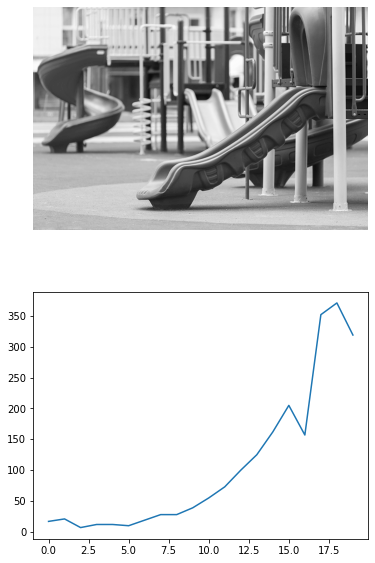

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像ファイル名の指定
image_file = "slides.png"

# 画像ファイルの読み込み
I_bgr = cv2.imread(image_file)

# BGRからRGBへの変換
I_rgb = cv2.cvtColor(I_bgr, cv2.COLOR_BGR2RGB)

# RGBからGrayへの変換
I_gray = cv2.cvtColor(I_rgb, cv2.COLOR_RGB2GRAY)

# Work: Grayスケール画像のヒストグラムを計算してみましょう．
hist = np.random.rand(30, 1)
hist = cv2.calcHist([I_gray],channels=[0],mask=None,histSize=[256],ranges=[0,256])
# 初めの20要素をplot
print("- hist_size: {0}".format(hist.shape))
print(hist[:20, 0])

# 表示処理
fig = plt.figure(figsize=(6,10))
plt.subplot(2, 1, 1)
plt.imshow(I_gray, cmap = "gray")
plt.axis('off')

plt.subplot(2, 1, 2)

# Work: ヒストグラムの表示
# plt.plot(...)
plt.plot(hist[:20, 0])
plt.show()


## カラー画像のヒストグラムの計算・表示

RGB画像の場合には，channelsに番号を指定して各チャンネルのヒストグラムを取り出せます．
- R(赤): 0
- G(緑): 1
- B(青): 2

例えば，青色を取り出したい場合，channelsに2を指定して，以下のようにかけます．

```py
hist_b = cv2.calcHist([I_rgb],channels=[2],mask=None,histSize=[256],ranges=[0,256])
```

ヒストグラムをplotする際，colorに色を表す文字'b'（青色）を指定すると，
```py
plt.plot(hist_b,color='b')
```

線に青色をつけることができます．

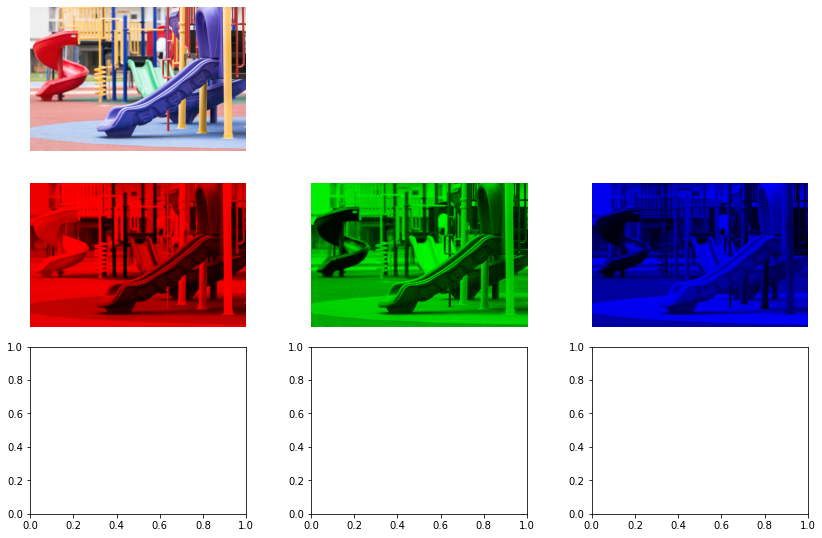

In [2]:
fig = plt.figure(figsize=(12,8))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.05, wspace=0.3)

plt.subplot(3,3,1)
plt.imshow(I_rgb)
plt.axis('off')

channels = ('r','g','b')
for i,ch in enumerate(channels):
  I_i = np.zeros_like(I_rgb)
  I_i[:,:,i] = I_rgb[:,:,i]
  
  plt.subplot(3,3,i+4)
  plt.imshow(I_i)
  plt.axis('off')

for i,ch in enumerate(channels):
  # Work: 各チャンネルのヒストグラムの計算
  # hist_i = cv2.calcHist(...)

  plt.subplot(3,3,i+7)
  # Work: ヒストグラムの表示
  # plt.plot(...)

plt.show()


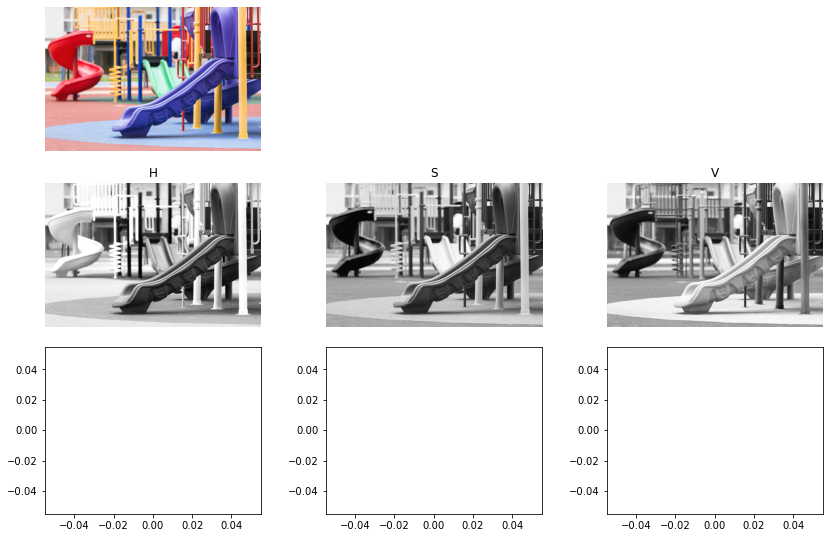

In [3]:
# Work: RGBからHSVに変換（下記を修正）
I_hsv = I_rgb

fig = plt.figure(figsize=(12,8))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.05, wspace=0.3)

plt.subplot(3,3,1)
plt.imshow(I_rgb)
plt.axis('off')

# HSV色空間に合わせてチャンネル名を編集
channels = ('H','S','V')
for i,ch in enumerate(channels):
  plt.subplot(3,3,i+4)
  plt.imshow(I_hsv[:,:,i], cmap = "gray")
  plt.title("{0}".format(ch))
  plt.axis('off')

for i,ch in enumerate(channels):
  # Work: 各チャンネルのヒストグラムの計算
  hist_i = []

  plt.subplot(3,3,i+7)
  plt.plot(hist_i)

plt.show()